# Load Data

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fpath='Data/WMT.csv'
df=pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5479 non-null   object 
 1   Adj Close  5284 non-null   float64
dtypes: float64(1), object(1)
memory usage: 85.7+ KB


,Date,Adj Close
0,2000-01-03,44.915394
1,2000-01-04,43.234756
2,2000-01-05,42.352402
3,2000-01-06,42.814564
4,2000-01-07,46.049828


In [3]:
df['Date']=pd.to_datetime(df["Date"])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5479 non-null   datetime64[ns]
 1   Adj Close  5284 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.7 KB


,Date,Adj Close
0,2000-01-03,44.915394
1,2000-01-04,43.234756
2,2000-01-05,42.352402
3,2000-01-06,42.814564
4,2000-01-07,46.049828


In [4]:
df=df.set_index('Date')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5479 entries, 2000-01-03 to 2020-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  5284 non-null   float64
dtypes: float64(1)
memory usage: 85.6 KB


,Adj Close
Date,
2000-01-03,44.915394
2000-01-04,43.234756
2000-01-05,42.352402
2000-01-06,42.814564
2000-01-07,46.049828


In [5]:
df.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=5479, freq=None)

In [6]:
df=df.resample('B').asfreq()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5479 entries, 2000-01-03 to 2020-12-31
Freq: B
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  5284 non-null   float64
dtypes: float64(1)
memory usage: 85.6 KB


,Adj Close
Date,
2000-01-03,44.915394
2000-01-04,43.234756
2000-01-05,42.352402
2000-01-06,42.814564
2000-01-07,46.049828


In [7]:
df.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=5479, freq='B')

In [8]:
df.isna().sum()

Adj Close    195
dtype: int64

In [9]:
df=df.fillna(method='ffill')
df.isna().sum()

Adj Close    0
dtype: int64

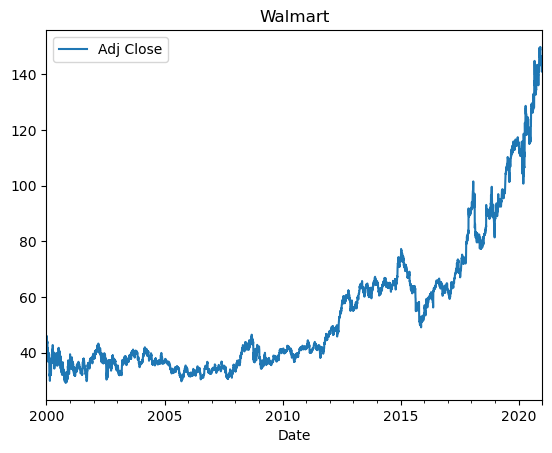

In [10]:
df.plot(title='Walmart');

In [13]:
plt.rcParams["figure.figsize"] = (12,4)
sns.set_context('talk',font_scale=.8)

<Axes: title={'center': 'Walmart'}, xlabel='Date'>

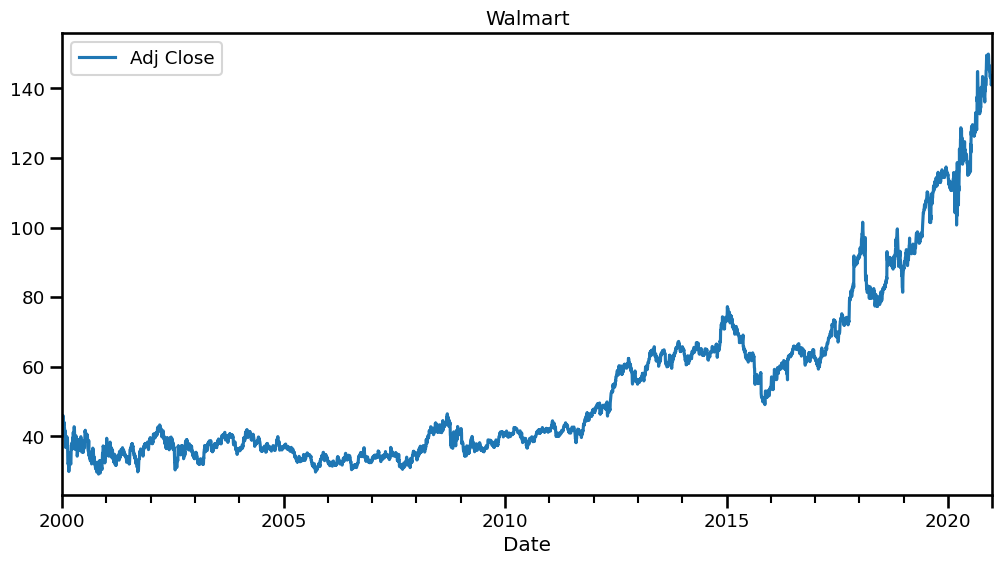

In [14]:
df.plot(title='Walmart');

In [17]:
import statsmodels.tsa.api as tsa

In [18]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])


In [20]:
adfuller_results=get_adfuller_results(df)
adfuller_results

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,2.45764,32,5446,0.999035,0.05,False


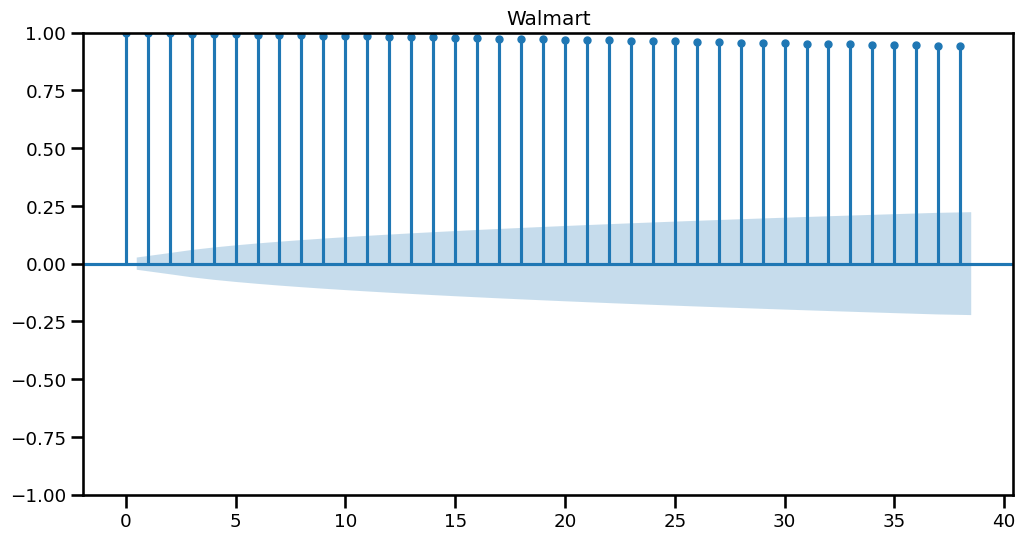

In [21]:
tsa.graphics.plot_acf(df,title='Walmart');

In [23]:
from pmdarima.arima.utils import ndiffs

In [24]:
d=ndiffs(df)
print(f'd is {d}')

d is 2


In [25]:
df.head()

,Adj Close
Date,
2000-01-03,44.915394
2000-01-04,43.234756
2000-01-05,42.352402
2000-01-06,42.814564
2000-01-07,46.049828


In [26]:
df.diff(2).head()

,Adj Close
Date,
2000-01-03,NaN
2000-01-04,NaN
2000-01-05,-2.562992
2000-01-06,-0.420192
2000-01-07,3.697426


In [27]:
dfd=df.diff(2)
dfd.info()
dfd.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5479 entries, 2000-01-03 to 2020-12-31
Freq: B
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  5477 non-null   float64
dtypes: float64(1)
memory usage: 85.6 KB


,Adj Close
Date,
2000-01-03,NaN
2000-01-04,NaN
2000-01-05,-2.562992
2000-01-06,-0.420192
2000-01-07,3.697426


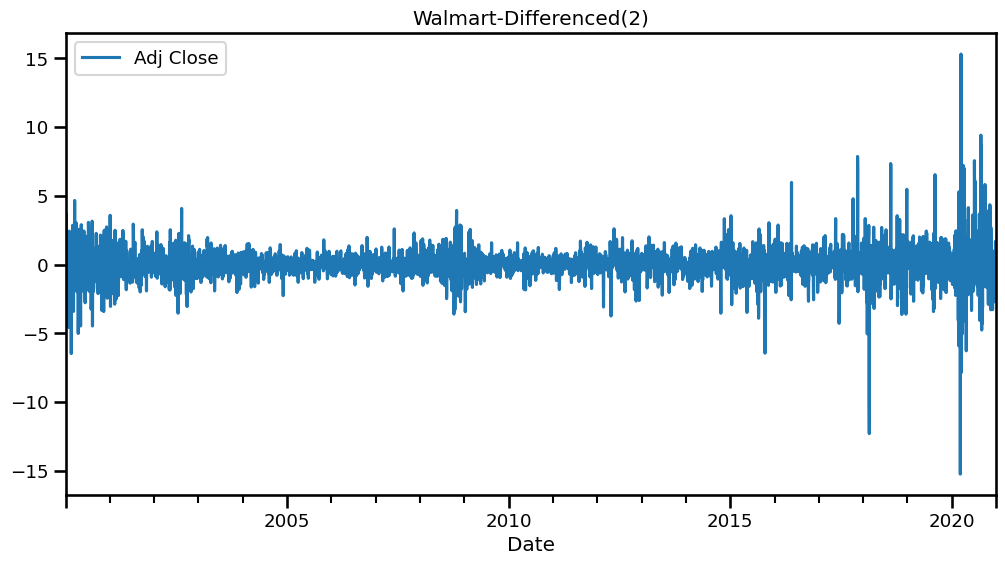

In [30]:
dfd=dfd.dropna()
dfd.plot(title='Walmart-Differenced(2)');

In [31]:
get_adfuller_results(dfd)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-14.223672,31,5445,0.0,0.05,True


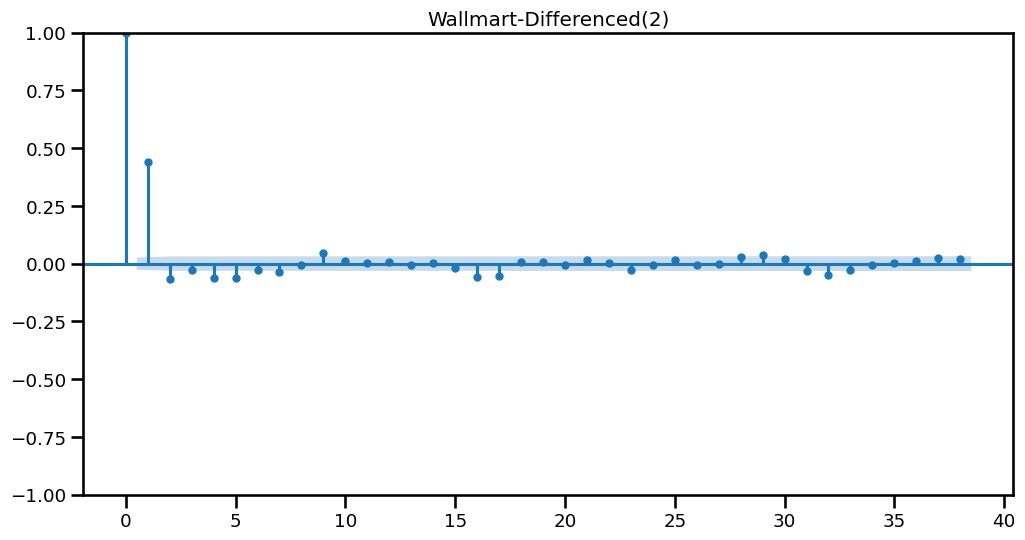

In [32]:
tsa.graphics.plot_acf(dfd,title='Wallmart-Differenced(2)');

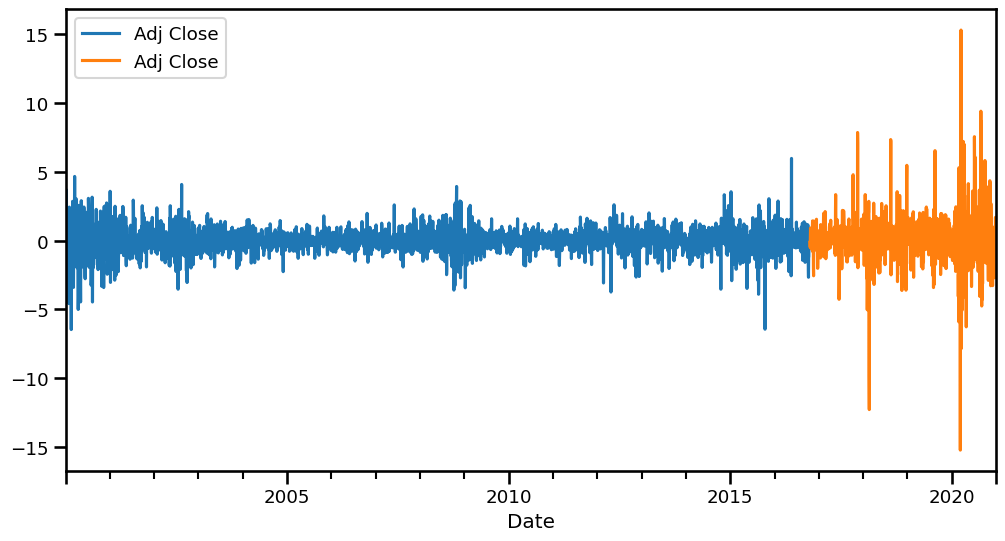

In [34]:
from pmdarima.model_selection import train_test_split
train,test = train_test_split(dfd,test_size=.20)
ax=train.plot(label='Train')
test.plot(ax=ax,label='Test')
ax.legend();